# Download Data

In [ ]:
import requests
import pandas as pd
from io import BytesIO

def download_csv(csv_url):
    response = requests.get(csv_url)
    response.raise_for_status()

    # Qui puoi modificare 'sep' o aggiungere altri parametri se necessario
    try:
        df = pd.read_csv(BytesIO(response.content), sep=',')
    except pd.errors.ParserError:
        df = pd.read_csv(BytesIO(response.content), sep=';', error_bad_lines=False)

    return df

In [ ]:
recipes_df = download_csv("https://github.com/GiovTemp/SustainaMeal_Case_Study/raw/main/data/final_recipes_set.csv")

In [ ]:
recipes_df

,title,sustainability_score,sustainability_label,Unnamed: 0,recipe_id,description,author_id,duration,directions,ingredients,...,protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names,healthiness_label
0,Jack O Lantern 'o Fragrance,0.002409,0,495656,466123,I suppose that this isn't really a recipe as m...,169430,30.0,['When you cut the lid out of the pumpkin do ...,"['pumpkin liking', 'candle pumpkin', 'pumpkin ...",...,0.6,7,4,0.302381,0.250,0.25,NaN,NaN,NaN,0
1,Boiled Radishes,0.002502,0,294268,179840,These taste a lot like new potatoes. The boil...,254469,22.0,"['Trim ends and bad spots off Radishes.', 'Boi...","['radishes size bag bunch', 'water radishes']",...,0.8,2,2,0.293040,1.000,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['applesauce', 'garlic clove', 'ginger', 'mola...",0
2,Horseradish Applesauce,0.002590,0,364381,174389,"I'm not sure this even qualifies as a recipe, ...",226918,22.0,"['Blend applesauce and horseradish. ', 'Refrig...","['applesauce', 'horseradish']",...,0.3,2,2,0.313757,0.875,0.50,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['all - purpose flour', 'butter', 'butternut s...",0
3,Survival Necklace,0.002623,0,43445,95937,Fun for kids to make and a great way to keep t...,25792,10.0,['Other supplies: 18 inches string or yarn or ...,['Fruit Loops cereal cup apple jacks kind hole...,...,8.8,7,2,0.319215,0.750,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Old Bay Seasoning', 'Worcestershire sauce', ...",0
4,Apple Cider Reduction,0.002623,0,59722,521756,I saw a post about this on Facebook and gave i...,171084,155.0,"['In 6-8 quart stock pan, measure out 2 cups o...","['gallon apple cider fresh', 'gallon apple cid...",...,0.0,10,2,0.214286,0.750,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['bean sprouts', 'chicken thighs', 'fresh ging...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100865,Curried Lamb on Rice,0.951024,2,103145,373244,"With modification this recipe is from ""The Dia...",133174,65.0,"['Over medium heat, melt the butter in a large...","['lamb', 'medium onion', 'cloves', 'butter', '...",...,28.7,5,13,0.223549,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Dijon mustard', 'Polish sausage', 'apricot p...",1
100866,Rich Lamb Curry,0.960504,2,442694,268247,The recipe isn't as time consuming as it looks...,491437,110.0,"['Heat 1 tbsp olive oil in dutch oven. ', 'Co...","['oil', 'lamb', 'flour', 'salt pepper', 'onion...",...,36.1,9,21,0.153328,0.000,0.00,NaN,NaN,NaN,1
100867,"Middle Eastern Slow-Cooked Stew With Lamb, Chi...",0.968458,2,359960,144850,From Cooking Light. Per 3/4 c. serving: 310 ca...,37779,112.0,['Let the oil get heating in a large pot over ...,"['oil', 'lamb', 'onions rings', 'water', 'clov...",...,20.8,12,19,0.205566,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['anchovies', 'celery ribs', 'diced tomatoes',...",1
100868,Five Meat Chili Con Carne With Beans,0.971454,2,37637,13568,yum,20571,210.0,"['In a large pot brown meat in stages, about a...","['beef', 'pork', 'lamb', 'sausage', 'sausage',...",...,14.5,7,15,0.197568,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"[""French\\'s French fried onions"", 'crabmeat',...",1


# Utils

In [ ]:
!pip install git+https://github.com/GiovTemp/SustainaMeal.git

  Cloning https://github.com/GiovTemp/SustainaMeal.git to /tmp/pip-req-build-jo4ir10j
  Running command git clone --filter=blob:none --quiet https://github.com/GiovTemp/SustainaMeal.git /tmp/pip-req-build-jo4ir10j
  Resolved https://github.com/GiovTemp/SustainaMeal.git to commit 13c4f421923712c8e19feac0ba3bbcab17f41a38
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.7/806.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.0/237.0 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.8 MB/s eta 0:00:00
  Created wheel for SustainaMeal: filename=SustainaMeal-0.1.0-py3-none-any.whl size=19108 sha256=52daff83582c935

# SustainaMeal (ETA: 15/20 mins)

Initializes the system by loading the data and preparing the embeddings.

In [ ]:
from sustainameal import SustainaMeal

#nutrients=['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']
nutrients = ['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']

sm = SustainaMeal(
    recipes_df=recipes_df,
    nutrients=['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]'],
    transformer_name='davanstrien/autotrain-recipes-2451975973'
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/879 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Processing Titles embeddings: 100%|██████████| 100870/100870 [16:32<00:00, 101.59batch/s]


# Upload Recipes of experiments

In [ ]:
import pandas as pd

# Paths to the JSON files

sustainability_label_2_recipes_file = './experiments/data/sustainability_label_2_recipes.json'

# Read the JSON files into pandas DataFrames

sustainability_label_2_recipes = pd.read_json(sustainability_label_2_recipes_file)


# Compare LLM Rerank

In [ ]:
sm.setup_openai_key("opken-ai-key")

In [ ]:
acceptable_tags = ['appetizers', 'main-dish', 'side-dishes', 'drinks', 'beverages', 'fruits', 'desserts',
                   'breakfast', 'pasta-rice-and-grains', 'rice', 'pasta', 'pizza', 'breads', 'meat', 'fish',
                   'seafood', 'beef', 'chicken', 'vegetarian']

In [ ]:
nutrients_string = ", ".join(nutrients)
print(nutrients_string)


calories [cal], totalFat [g], saturatedFat [g], cholesterol [mg], sodium [mg], dietaryFiber [g], sugars [g], protein [g]


In [ ]:
selected_recipes = pd.concat([sustainability_label_2_recipes])

In [ ]:
len(selected_recipes)

100

In [ ]:
# Definisci le soglie
WHO_SCORE_THRESHOLDS = ( 0.15, 0.25)  # (soglia media, soglia alta)
SUSTAINABILITY_SCORE_THRESHOLDS = (0.1, 0.5)  # (soglia media, soglia alta)

# Funzioni di aiuto per calcolare le label
def calculate_healthiness_label(who_score):
    if who_score > WHO_SCORE_THRESHOLDS[1]:
        return "0"
    elif who_score < WHO_SCORE_THRESHOLDS[0]:
        return "2"
    else:
        return "1"

def calculate_sustainability_label(sustainability_score):
    if sustainability_score <= SUSTAINABILITY_SCORE_THRESHOLDS[1]:
        return "0"
    elif sustainability_score >= SUSTAINABILITY_SCORE_THRESHOLDS[1]:
        return "2"
    else:
        return "1"

# Calcola le label in base ai valori di who_score e sustainability_score

In [ ]:
similar_recipes = sm.find_similar_recipes("Pasta", 10, acceptable_tags=acceptable_tags, match_all_tags=False)

In [ ]:
ordered_recipes = sm.order_recipe_by_sustainameal()
print(ordered_recipes)

In [ ]:
ordered_recipes_gpt = sm.order_recipe_by_sustainameal()
print(ordered_recipes_gpt)

In [ ]:
best_choice_by_gpt = sm.choose_best_recipe_with_gpt()

In [ ]:
import json
import pandas as pd

# Assumi che 'SustainaMeal', 'acceptable_tags', 'nutrients_string', e 'recipe_titles' siano definiti

# Parametri per gli esperimenti
k_values = [10]
match_all_tags_values = [False]

# Funzione ausiliaria per convertire oggetti in formati serializzabili in JSON
def convert_to_serializable(obj):
    if hasattr(obj, 'to_dict'):
        return obj.to_dict('records')
    elif hasattr(obj, 'tolist'):
        return obj.tolist()
    elif isinstance(obj, (list, dict, str, int, float, bool, type(None))):
        return obj
    else:
        return str(obj)

results = []  # Lista per raccogliere i risultati degli esperimenti

for index, row in selected_recipes.iterrows():
    input_recipe = row['title']
    match_results = {}  # Dizionario per memorizzare i risultati di match per ogni k
    for k in k_values:
        match_results[k] = {'exact_match': False, 'match_count': 0}  # Inizializza il conteggio e il match esatto per ogni k
        for match_all_tags in match_all_tags_values:
            try:
                similar_recipes = sm.find_similar_recipes(input_recipe, k, acceptable_tags=acceptable_tags, match_all_tags=match_all_tags)
                ordered_recipes = sm.order_recipe_by_sustainameal()
                ordered_recipes_gpt = sm.order_recipe_by_sustainameal()

                best_choice_by_gpt = sm.choose_best_recipe_with_gpt()
                gpt_choice_match = ordered_recipes.iloc[0]['title'] == best_choice_by_gpt
                if gpt_choice_match:
                    match_results[k]['match_count'] += 1
                    if match_all_tags:  # Se consideri importante il match quando match_all_tags è True
                        match_results[k]['exact_match'] = True
                result = {
                    'recipe_name': input_recipe,
                    'recipe_id': row['recipe_id'],
                    'sustnability_score': row['sustainability_score'],
                    'sustnability_label': row['sustainability_label'],
                    'who_score': row['who_score'],
                    'healthiness_label': row['healthiness_label'],
                    'k': k,
                    'nutrients': nutrients_string,
                    'match_all_tags': match_all_tags,
                    'gpt_choice': best_choice_by_gpt,
                    'similar_recipes': convert_to_serializable(similar_recipes) if similar_recipes is not None else None,
                    'ordered_by_sustainameal': convert_to_serializable(ordered_recipes) if ordered_recipes is not None else None
                }
                results.append(result)
            except Exception as e:
                print(f"An error occurred while finding similar recipes: {e}")
                best_choice_by_gpt = None



    # Calcola la percentuale di similarità per ogni k e aggiungi ai risultati
    # for k, match_info in match_results.items():
    #     match_info['similarity_percentage'] = (match_info['match_count'] / len(match_all_tags_values)) * 100
    #     results.append({
    #         'recipe_name': input_recipe,
    #         'k': k,
    #         'exact_match': match_info['exact_match'],
    #         'similarity_percentage': match_info['similarity_percentage']
    #     })

# Salva i risultati in un file JSON
with open('experiment_results_with_gpt_and_similarity_k_10.json', 'w') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 88.43batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922
Based on a balance of sustainability and healthiness, the recommended recipe is:

89011. Recipe: Chicken and Broccoli Pesto Pasta Toss


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.44batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921
Based on a balance of sustainability and healthiness, the recommended recipe to choose is: Recipe: Lady's Italian Baked Tilapia.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 28.86batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552
Based on a balance of sustainability and healthiness, it is recommended to choose the following recipe:

1. Recipe: Chicken Broccoli Casserole for Freezer


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.49batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:

94088. Recipe: Skillet Lasagna With Italian Sausage and Butternut Squash


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 38.66batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended order for the recipes would be as follows:

1. Recipe: Souperior Meatloaf
2. Recipe: Erin's Meatloaf "Muffins"
3. Recipe: Diner Meatloaf and Meatballs Mixture
4. Recipe: Glazed Meatloaf
5. Recipe: Good & Easy Meat Loaf
6. Recipe: Barbara's Basic Meatloaf
7. Recipe: Deviled Beef Hamburger Patties
8. Recipe: Biff a La Lindstrom (Scandinavian Hamburgers)
9. Recipe: Many Way Meatballs

The recommended recipe to choose would be "Souperior Meatloaf".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 93.48batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:
96414. Recipe: Incomparable Beef Stew


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 101.33batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:

Recipe: Basic Salmon Packet (Baked) (18878)


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.24batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:

41795. Recipe: Tuscan Chicken in Lemon-Wine Sauce (Scaloppine Al Limone)


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:

100840. Recipe: Filipino Roast Leg of Lamb With Sarsa


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.20batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534
Based on a balance of sustainability and healthiness, the recommended recipes from most to least would be:

1. Recipe: Chilled Shrimp in Chinese Mustard Sauce
2. Recipe: Awesome Shrimp over Pasta
3. Recipe: Curried Chicken and Shrimp
4. Recipe: Cioppino, Seafood Stew
5. Recipe: Fried Rice, Cuban Chinese Style
6. Recipe: Flounder With Bananas, Almonds and Rum
7. Recipe: Delightful Chicken Souffle
8. Recipe: Main Dish Mac Salad
9. Recipe: Shrimp Dino
10. Recipe: How to Boil a Lobster

The recommended recipe for you to choose is "Chilled Shrimp in Chinese Mustard Sauce."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.05batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is "Alphabet Beef Vegetable Soup- Crock Pot" (Recipe ID: 97107).


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.06batch/s]


Tags to match: ['main-dish', 'pasta-rice-and-grains']
Number of filtered recipes: 32751
Based on a balance of sustainability and healthiness, the recommended recipes from most to least are:

1. Recipe: Penne With Sausage, Peas and Mascarpone
2. Recipe: Salmon Penne With Basil Pesto Cream Sauce, Artichokes, and Asparagus
3. Recipe: Parmigiano-Crusted Rigatoni W/Cauliflower & Bacon
4. Recipe: Creamy Spinach Artichoke Pasta
5. Recipe: Loaded Potato & Broccoli Bake
6. Recipe: Penne With Sausage, Tomato, Red Pepper in Cream Sauce
7. Recipe: Chicken and Linguine in Creamy Vodka Sauce
8. Recipe: Pasta Neapolitan
9. Recipe: Twice Baked Potatoes, Italian Style OAMC
10. Recipe: Firebirds Chicken Pasta (Copycat)

Based on the ranking, the recommended recipe for you to choose is "Penne With Sausage, Peas and Mascarpone."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.18batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:

1. Recipe: Poached Chicken in Olive Oil, Garlic, and Green Peppercorn Sauce

Please note that the other recipes have not been ranked as they were not specifically evaluated for sustainability and healthiness.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.30batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534
Based on a balance of sustainability and healthiness, the recommended recipe to choose is "Recipe: Lemon Chicken With Artichokes."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.13batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476
Based on a balance of sustainability and healthiness, the recommended recipe is:

33432. Broiled Fish with Dill Butter


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.51batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe would be:
94843. Recipe: Spinach Ricotta-Stuffed Chicken Breasts


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.48batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752
Based on a balance of sustainability and healthiness, the recommended recipe would be:

81192. Recipe: Chorizo & Goat Cheese Quesadillas


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.50batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452
Based on a balance of sustainability and healthiness, the recipes should be ranked as follows:

1. Recipe: Beef With Veggies
2. Recipe: Korean Barbecue Beef
3. Recipe: Shortcut Shepherd's Pie
4. Recipe: Easy Oven Beef and Gravy
5. Recipe: Darn Good Bulgogi
6. Recipe: Dino's Marvelous Meatloaf
7. Recipe: Beef and Pineapple Kebabs (Anguilla)
8. Recipe: Hacienda Hamburger Skillet
9. Recipe: "the Best " Beef Stroganoff
10. Recipe: Dave's Heart Attack on a Plate

Based on the rankings, the recommended recipe to choose would be "Beef With Veggies."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.17batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552
Based on sustainability and healthiness, the recipes can be ranked as follows:

1. Recipe: Turkey Chili (High Fiber, Low-Calorie and Low-Fat)
2. Recipe: Beef, Bean and Tomato Soup
3. Recipe: Brazilian Black Bean Stew, Another Version - Slow Cooker
4. Recipe: Jim's Award-Winning Chili
5. Recipe: Spicy Sausage and Pepper Stew
6. Recipe: All American County Fair Prize Winning Chili
7. Recipe: Chili's Egg Rolls-Lightened Up!!!
8. Recipe: Layered Cornbread Salad
9. Recipe: Chili For Frito Pie
10. Recipe: Bachelors Chili

Based on this ranking, the recommended recipe would be "Recipe: Turkey Chili (High Fiber, Low-Calorie and Low-Fat)."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.25batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922
Based on a balance of sustainability and healthiness, the recipes should be ranked as follows:

1. Recipe: Chicken a La Chardon
2. Recipe: Crock Pot Chicken Breast in Poblano Cream
3. Recipe: Chicken Breasts With Lime Curry Sauce
4. Recipe: Easy Boneless Pork Chop With an Amazing Flavour
5. Recipe: Savory Stuffed Pork Chops Au Jus
6. Recipe: Deep Dish Taco Salad
7. Recipe: Deb's Italian Noodle Casserole
8. Recipe: Cheese and Mushroom Spiral Meatloaf
9. Recipe: Outstanding Spanish Stuffed Green Bell Peppers
10. Recipe: Micro Beef Pie

For the best choice, I would recommend "Recipe: Chicken a La Chardon."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.34batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752
Based on a balance of sustainability and healthiness, the recipes can be ranked as follows:

1. Recipe: Chicken, Mushroom and Spinach pasta with blue cheese sauce
2. Recipe: Pasta With Ricotta Bolognese
3. Recipe: Beef Pasta with Tomato-Spinach Sauce
4. Recipe: Curry Chicken With Applesauce
5. Recipe: Oriental Beef and Spaghetti Pie (spicy)
6. Recipe: Turkey and Tortellini Tetrazzini
7. Recipe: Baked Buffalo Chicken Pasta
8. Recipe: Simple Tuna Hot Dish or Casserole
9. Recipe: Bagel Tuna Melt
10. Recipe: Cheeseburger Spaghetti

Based on this ranking, the recommended recipe would be "Chicken, Mushroom and Spinach pasta with blue cheese sauce."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.18batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe would be:

96034. Recipe: Terrific Teriyaki Burgers


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.69batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipes from most to least would be:

1. Recipe: Roasted Peppers and Sausage Pasta With Dijon Vinaigrette
2. Recipe: Ziti With Sausage and Cannellini
3. Recipe: Creamy Baked Pasta
4. Recipe: Bacon Barley Bread
5. Recipe: Tex Mex BLT
6. Recipe: Hawaiian Chili
7. Recipe: North Georgia Brunswick Stew
8. Recipe: Another Sausage and Pepper Recipe
9. Recipe: P. Y. T. - a Michael Jackson Tribute
10. Recipe: Chili Con Coors

The recommended recipe for you to choose is "Recipe: Roasted Peppers and Sausage Pasta With Dijon Vinaigrette".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.65batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752
Based on a balance of sustainability and healthiness, the recipes ranked from most to least recommended are:

1. Recipe: Vegetable Spaghetti Bake (94085)
2. Recipe: Mushroom & Veggie Sausage Lasagna (92852)
3. Recipe: Lightened Fannie Farmer's Classic Baked Macaroni and Cheese (93803)
4. Recipe: Easiest Mac 'n' Cheese (93617)
5. Recipe: Fusilli Cheddar Bake (82624)
6. Recipe: Cheesy Baked Stuffed Tuna Melts (90832)
7. Recipe: Dee's Swiss Chicken Casserole (92600)
8. Recipe: Krystal's Chicken Spaghetti (85064)
9. Recipe: Sausage and Pepper Pasta Bake (87616)
10. Recipe: Chicken Biscuit Stew (63717)

Based on this ranking, the recommended recipe for you to choose would be: Vegetable Spaghetti Bake (94085).


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.64batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070
Based on a balance of sustainability and healthiness, the recommended recipes from most to least would be:

1. Recipe: Antojitos
2. Recipe: Kitchen Kouture Stuffed Mushrooms
3. Recipe: Lasagna with Zucchini Noodles
4. Recipe: Pine Nut Brie Nibble
5. Recipe: Sam's Blue Cheese Dip
6. Recipe: Sue's Hot Beef Dip
7. Recipe: Seafood Surprise Dip
8. Recipe: Veronica's Bacon Muffins
9. Recipe: BBQ Jalapeno Shrimp Poppers
10. Recipe: Hotter Than Hell Sausage Dip

Based on these criteria, the best choice would be "Recipe: Antojitos."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 84.51batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:

Recipe: Cilantro Chicken Salad


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.02batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106
Based on a balance of sustainability and healthiness, the recommended recipe is:

76052. Recipe: Portuguese-Style Sardines on Toast


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.01batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922
Based on a balance of sustainability and healthiness, the recommended recipe is:
20681. Recipe: Chicken and Sausage Jambalaya with Okra


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.58batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552
Here is the recommended recipe based on a balance of sustainability and healthiness:

1. Recipe: Healthy Slow Cooker Creamy Chicken and Vegetables (48761)

This recipe is likely to be the most sustainable and healthy option.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.39batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476
Based on a balance of sustainability and healthiness, the recipes can be ranked as follows:

1. Recipe: Greek Braised Lamb With Green Beans and Tomato (100807)
2. Recipe: Tuscan Lemon Chicken With Warm Bean Salad (31109)
3. Recipe: Chili'd Chicken (66279)
4. Recipe: Amy's Chicken Divan Casserole (77945)
5. Recipe: Ranch Chicken Chopped Salad (84570)
6. Recipe: Anita's Cheese and Potato Beef Pie (98850)
7. Recipe: Wendy's Restaurant Copycat Chili (96485)
8. Recipe: Rustler's Chili Con Carne With Beans (96334)
9. Recipe: Flint Ridge Pheasant (95090)
10. Recipe: Curried Conch (40325)

The recommended recipe for you would be "Greek Braised Lamb With Green Beans and Tomato" (100807).


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.63batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921
Based on a balance of sustainability and healthiness, the recommended recipe to choose is "Algerian Lamb and Lentil Soup."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.06batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, here is the recommended ranking for the recipes:

1. Recipe: Vegetable Lasagna Rolls
2. Recipe: Toasted Ham and Gouda Sandwiches
3. Recipe: Tangy Tortilla Casserole
4. Recipe: Funky Chicken Sandwich
5. Recipe: Skillet Sausage and Chicken
6. Recipe: Delicious Sour Cream Chicken Enchilada Casserole
7. Recipe: Hearty Meat Lasagna (Oamc)
8. Recipe: Ground Beef and Onion Gratin
9. Recipe: Mouthwatering Beef Lasagna
10. Recipe: Easy Cheesy Shepherd's Pie

Based on the ranking, the recommended recipe is: Vegetable Lasagna Rolls.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is: 

57268. Recipe: Smoky Roasted Chicken and Corn Chowder


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 94.95batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476
Based on a balance of sustainability and healthiness, the recommended recipe to choose is: Recipe: Zucchini & Beef.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.95batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is "Chicken Breasts With Tomato-Basil Sauce".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.96batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:

31721. Recipe: Crock Pot - Beef Teriyaki With Broccoli


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.70batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922
Based on a balance of sustainability and healthiness, the recipes can be ranked as follows:

1. Recipe: Boneless Chicken
2. Recipe: Melt in Your Mouth Lemon Chicken
3. Recipe: Chicken Guadalajara
4. Recipe: Swiss Chicken & Broccoli Casserole
5. Recipe: Pecorino Romano Chicken Breast
6. Recipe: Copycat Recipe for Carrabba's Chicken Marsala
7. Recipe: Mom's Favorite Chicken
8. Recipe: Pork Chops in Mushroom Gravy
9. Recipe: Creamed Salmon
10. Recipe: Zesty Chicken and Garlic White Pizza

Based on this ranking, the recommended recipe to choose would be "Boneless Chicken".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.22batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:
1. Recipe: Broccoli and Chicken Tortellini Soup


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.30batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipes from most to least are:

1. Recipe: Cold Spicy Cashew Noodles - 33430
2. Recipe: Oriental Style Beef Tips and Veggie Stir Fry - 18236
3. Recipe: Hacienda Hamburger Skillet - 60619
4. Recipe: Easy Oven Beef and Gravy - 47792
5. Recipe: Shortcut Shepherd's Pie - 31654
6. Recipe: Teriyaki Beef or Chicken - Hawaiian - 6379
7. Recipe: Korean Steak - 12964
8. Recipe: Korean Barbecue Beef - 96035
9. Recipe: Anguillan Kebabs - 96504
10. Recipe: Beef and Pineapple Kebabs (Anguilla) - 97108

You should choose the "Cold Spicy Cashew Noodles" recipe.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.13batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476
Based on a balance of sustainability and healthiness, the recommended recipe is:

1. Recipe: Grilled Chick N Wrappers


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.73batch/s]


Tags to match: ['appetizers', 'main-dish', 'pizza']
Number of filtered recipes: 33307
Based on a balance of sustainability and healthiness, the recipes should be ranked as follows:

1. Recipe: Lemon Baked Cod (62850)
2. Recipe: Herb-Coated Cod (90161)
3. Recipe: Angel Hair Tuna (71347)
4. Recipe: Zucchini and Tuna Quesadillas (72870)
5. Recipe: Lemon Italian Chicken Pasta (76223)
6. Recipe: Turkey & Stuffing Casserole (93342)
7. Recipe: Inside-Out Stuffed Bell Peppers (98647)
8. Recipe: Baked Beef Ravioli (99835)
9. Recipe: Ravioli With Meat Filling (100506)
10. Recipe: Pastry Tostadas Ole (98441)

You should choose "Lemon Baked Cod" (62850) as the most recommended recipe based on sustainability and healthiness.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.05batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:
57355. Recipe: Chicken With Cream, Apples and Calvados


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.66batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:

68276. Recipe: Salmon Patties With Lemon Sauce


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.22batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipes from most to least are:

1. Recipe: Layered Vegetable Pie
2. Recipe: Amish Country Potato Soup
3. Recipe: Eggplant (Aubergine) Roll
4. Recipe: Spinach Enchiladas
5. Recipe: Pasta with Broccoli, Cheese and Bacon
6. Recipe: Farfalle (Bow-Tie Pasta) With Creamy Bacon & Leek Sauce
7. Recipe: Beef With Black Olives Pie
8. Recipe: Traditional English Beef & Potato Picnic Pies - Pasties
9. Recipe: Mac and Blue
10. Recipe: Grilled Cheese and Pulled Short Ribs Sandwich

Based on the given options, the recommended recipe to choose would be "Layered Vegetable Pie".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.71batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106
Based on a balance of sustainability and healthiness, the recommended recipe is:

100328. Recipe: Spinach & Ground Beef Lasagna


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.89batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:

90797. Recipe: Chicken with Mushrooms and Provolone


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.99batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is "Zucchini Pizza Casserole" (Recipe number 100387).


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.72batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289
Based on a balance of sustainability and healthiness, the recommended recipe is:
83024. Recipe: Black Bean, Egg & Corn Casserole


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.67batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:

95947. Recipe: Lower Fat, Higher Fiber Beef Bolognese Sauce


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.64batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:
99023. Recipe: Bartolino's Meatballs


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.75batch/s]


Tags to match: ['breakfast', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34619
Based on a balance of sustainability and healthiness, the recipes should be ranked from most to least recommended as follows:

1. Recipe: Poached Egg With Salmon, Spinach & Meyer Lemon Vinaigrette
2. Recipe: Comfort Eggs
3. Recipe: Curried Quiche
4. Recipe: Sunny Toast
5. Recipe: Hole in the Wall
6. Recipe: Potato and Garlic Sausage Hash
7. Recipe: Diabetic Dutch Apple Pancake
8. Recipe: Better Than Caviar Egg Salad Araby
9. Recipe: Pumpkin Stuffed French Toast
10. Recipe: Flourless Peanut Butter, Pumpkin Butter Pancakes

You should choose the recipe "Poached Egg With Salmon, Spinach & Meyer Lemon Vinaigrette."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.78batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:
Recipe: Swiss Chard & Italian Sausage Lasagna


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.21batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is: Recipe: My Thai Chicken Curry


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.23batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, here is the recommended ranking of the recipes:

1. Recipe: Norwegian Potato Soup
2. Recipe: Vegetable-Beef Barley Soup (Crock Pot)
3. Recipe: Quinoa Stir-Fry With Vegetables and Chicken
4. Recipe: Spinach Fettuccine With Chicken and Broccoli
5. Recipe: Lean Weight Watchers Shepherds Pie
6. Recipe: Weight Watchers Crock Pot Chicken Chili
7. Recipe: Firehouse Tex-Mex Casserole
8. Recipe: Truly the Best Cabbage Rolls
9. Recipe: Ww Chili Beef Tacos 2 Pp Value
10. Recipe: Pasta W/ Pesto Shrimp

Based on this ranking, the recommended recipe for you to choose would be: "Norwegian Potato Soup".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.42batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended order for the recipes would be:

1. Recipe: Greek Braised Chicken
2. Recipe: Pork Stew With Cumin (Portugal)
3. Recipe: Indonesian Pork-Babi Pangang
4. Recipe: Leskovac Burger
5. Recipe: Homemade Summer Sausage Aka Salami
6. Recipe: BBQ-Less Country-Style Pork Ribs
7. Recipe: Butterfied Leg of Lamb with Ginger
8. Recipe: Pork Chops with Cheese and Ale
9. Recipe: Baked Chicken Delicious
10. Recipe: French Gorton Spread

Based on this order, the recommended recipe for you to choose is "Greek Braised Chicken".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.02batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:

98923. Recipe: Homestyle Meatloaf


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.17batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipes in order are:

1. Recipe: Tish's Crock Pot Corned Beef and Cabbage
2. Recipe: Homemade Pastrami - No Smoker Needed
3. Recipe: Slow Cooker Corned Beef
4. Recipe: Corned Beef With Homemade Glaze
5. Recipe: Brown Sugar and Mustard Glazed Corned Beef
6. Recipe: Corned Beef Brisket in Raspberry Vinaigrette (Crock Pot)
7. Recipe: Flight to Hong Kong Chicken Wings
8. Recipe: Delicious Chops of Pork
9. Recipe: Disco's Hot and Tangy New York Strip Steaks
10. Recipe: Speedy Meatballs Scandia

Based on these rankings, the recommended recipe for you is:

Recipe: Tish's Crock Pot Corned Beef and Cabbage


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921
Based on a balance of sustainability and healthiness, the recommended order for the recipes would be:

1. Recipe: Cannellini and Sausage Soup
2. Recipe: Chili, Family-Style
3. Recipe: Tasty Tamale Pie
4. Recipe: Anytime Chili
5. Recipe: Quick Easy Chili
6. Recipe: Boo's Chili
7. Recipe: Mawthook's Beefy Chili
8. Recipe: Cold Day Chili
9. Recipe: Sandi's Auction Chili
10. Recipe: Blood Gravy

For your choice, I recommend "Recipe: Cannellini and Sausage Soup".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 97.39batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:

82119. Recipe: Saucy Chicken and Asparagus


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.81batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose would be:

94454. Recipe: Baked Eggs Florentine


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.10batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552
Based on a balance of sustainability and healthiness, the recommended recipe would be:
97959. Recipe: Picante Black Bean Soup


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.61batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552
Based on a balance of sustainability and healthiness, the recommended recipe to choose is: Recipe: Japanese Stuffed Mushrooms.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.93batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:

79675. Recipe: Lemon-Thyme Chicken With Sweet Gnocchi


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.24batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922
Based on a balance of sustainability and healthiness, the recommended recipe is:

100340. Recipe: Debbie's Lasagna


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.02batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipes from most to least would be:

1. Recipe: Jambalaya (Authentic)
2. Recipe: Gluten Free Meatloaf
3. Recipe: Homemade Pastrami (Crockpot)
4. Recipe: My Favorite Corned Beef and Cabbage
5. Recipe: Corned Beef With a Plum Glaze (Slow Cooker)
6. Recipe: Corned Beef With Mustard Glaze
7. Recipe: Ruby-Glazed Corned Beef
8. Recipe: Miriam Reichl's Corned Beef Ham
9. Recipe: Ultimate Corned Beef
10. Recipe: Knottsberry Farm Meatloaf

The recommended recipe for you is "Jambalaya (Authentic)."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.76batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476
Based on a balance of sustainability and healthiness, the recommended recipe is "Recipe: Stir Fried Kai Lan or Broccoli".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.72batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipes from most to least are:

1. Recipe: Vegetarian Southwest Lasagna
2. Recipe: Santa Fe Chicken With Saffron Rice
3. Recipe: Chicken Black Bean Taco Salad
4. Recipe: Chili Stuffed Bell Peppers
5. Recipe: Cheese Tortellini With Beans and Spinach
6. Recipe: Penne with Turkey, Bacon and Camembert
7. Recipe: Pasta E Fagioli Casserole
8. Recipe: Chicken Paprikash #RSC
9. Recipe: Patrick's White Chicken Chili
10. Recipe: Tuna Fish Wiggle

Based on the rankings, the recommended recipe for you to choose is "Vegetarian Southwest Lasagna."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.49batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552
Based on a balance of sustainability and healthiness, the recommended recipe is:

99418. Recipe: Chunky Tomato Pasta Bake


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.75batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipes from most to least are:

1. Recipe: Tasty and Easy Low Fat Seafood Casserole
2. Recipe: Quick Herbed Orange Roughy
3. Recipe: Feta Stuffed Pesto Chicken
4. Recipe: Crispy Oven Baked Chicken
5. Recipe: Chili's Tortilla Crunch Chicken Fingers
6. Recipe: Pretzel Crusted Chicken Breasts
7. Recipe: Just Like Mom's Meatloaf
8. Recipe: Easy Pleasing Extra Lean Meatloaf
9. Recipe: Porcupine Meatloaf Crock Pot
10. Recipe: Amethyst's Paleo Elk Meatloaf

Based on the ranking, the recommended recipe would be "Tasty and Easy Low Fat Seafood Casserole."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.54batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070
Based on a balance of sustainability and healthiness, the recipes should be ranked as follows:

1. Recipe: Easy Layered Tomato Dip (87720)
2. Recipe: Cream Cheese and Crab Spread (62288)
3. Recipe: Keg's Mushroom Neptune (93295)
4. Recipe: Three-Cheese Mini Macaroni and Cheeses (95271)
5. Recipe: Toasty Chicken Squares (61060)
6. Recipe: Bacon Ranch Bread Bites (82852)
7. Recipe: Hot Cheese Bites (72426)
8. Recipe: Sweet & Sour Meatball Sauce (98896)
9. Recipe: Toasted Cheddar Bacon Bites (81626)
10. Recipe: Hot Devils (95639)

Based on the rankings, the recommended recipe to choose would be: 

Recipe: Easy Layered Tomato Dip (87720)


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.01batch/s]


Tags to match: ['appetizers', 'breakfast', 'main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 48155
Based on a balance of sustainability and healthiness, the recommended recipe is:

49162. Recipe: Thai Grilled Chicken Thighs for 2


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.34batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752
Based on a balance of sustainability and healthiness, the recommended recipe is:

95073. Recipe: My Lasagna


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Ranking the recipes from most to least recommended based on sustainability and healthiness, the recommended recipe is:

1. Recipe: Short Ribs Provencale


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.27batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:
88261. Recipe: Fabulous Grilled Chicken Spiedini


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.29batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:

99784. Recipe: Eggplant (Aubergine) Rigatoni Bake


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.70batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:
98580. Recipe: Bodacious Hamburgers


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.29batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922
Based on a balance of sustainability and healthiness, the recommended recipes from most to least are:

1. Recipe: Grilled Beef Fajitas With Avocado Pico De Gallo
2. Recipe: Perfect Potluck Dish Sausage and Pepper Baked Ziti
3. Recipe: Ham & Asparagus Pie
4. Recipe: Grilled Ham and Gouda Sandwich W/Caramelized Onions
5. Recipe: Hot Turkey and Cheddar Cheese Sandwiches
6. Recipe: Family Goulash
7. Recipe: Jan's Lasagna
8. Recipe: Easy Crock Pot Lasagna
9. Recipe: Upside Down Pepperoni Pizza Casserole
10. Recipe: Ground Beef N Biscuits

Based on the ranking, the recommended recipe would be: Grilled Beef Fajitas With Avocado Pico De Gallo.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.23batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452
Based on a balance of sustainability and healthiness, the recommended recipe from most to least would be:

1. Recipe: Vegetable Pot Pie / Pies
2. Recipe: Pasta, Zucchini, and Basil With Cream
3. Recipe: Lazy Stuffed Cabbage Casserole
4. Recipe: Pasta With Bell-Pepper-Onion-Sauce
5. Recipe: Hashwe (Arabian Stuffed Vegetables)
6. Recipe: Lemon Fusilli With Arugula Barefoot Contessa - Ina Garten
7. Recipe: Pasta with Spicy Garlic Cream Sauce
8. Recipe: Simple Beef Stew - Crock Pot
9. Recipe: Crock Pot Steak and Black Bean Chili
10. Recipe: Cauliflower-Cheese Pot Pies

The recommended recipe for you to choose is "Vegetable Pot Pie / Pies."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 89.19batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922
Based on a balance of sustainability and healthiness, the recommended recipe to choose is: 

83507. Recipe: Curried Chicken Florentine


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.12batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534
Based on a balance of sustainability and healthiness, I would recommend choosing the following recipe:

1. Recipe: Spinach and Shrimp


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.04batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, I would recommend the following recipe:

1. Recipe: Asian Lettuce Cups With Spicy Ground Turkey Filling


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.96batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106
Based on a balance of sustainability and healthiness, the recommended recipe to choose is "Whipped Cottage Cheese".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.02batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922
Based on a balance of sustainability and healthiness, the recommended recipe to choose is "Grits With Greens and Shrimp."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.35batch/s]


Tags to match: ['side-dishes', 'beef', 'meat']
Number of filtered recipes: 31341
Based on a balance of sustainability and healthiness, the most recommended recipe is:

65275. Recipe: Broad Beans With Pangrattato


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:
"Oven Cook Bag Stuffed Bell Peppers" (Recipe ID: 98563)


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.53batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe is:

96223. Recipe: Melt in Your Mouth Beef Stew


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.90batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921
Based on a balance of sustainability and healthiness, the recommended recipe is "Shortcut Shepherd's Pie".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.25batch/s]


Tags to match: ['beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 28790
Based on a balance of sustainability and healthiness, the recommended recipe to choose is: 

91840. Recipe: Vegetable Lasagna W/ Fontina Cheese & Creamy Parmesan Sauce


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.78batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922
Based on a balance of sustainability and healthiness, here is the recommended ranking:

1. Recipe: Crock Pot Chicken & Veggie Stew
2. Recipe: Leftover Thanksgiving Soup
3. Recipe: Ground Beef and Summer Squash Skillet
4. Recipe: Greek Pasta Bake
5. Recipe: Chicken (Turkey) a La King in Toast Cups
6. Recipe: Oriental Pork Stew
7. Recipe: Baked Chicken Breasts With Cornbread Stuffing
8. Recipe: Spicy Potato-Beef Soup
9. Recipe: Rob's Super Bowl Chili
10. Recipe: Taco-Stuffed Pasta Shells

Based on this ranking, the recommended recipe to choose would be "Crock Pot Chicken & Veggie Stew".


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.50batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, I would recommend the following recipes from most to least recommended:

1. Recipe: Spinach & Mushroom Salad
2. Recipe: Warm Spinach and Basil Salad
3. Recipe: Tomato and Onion Tart (Gourmet Magazine)
4. Recipe: Linguine With Sun-Dried Tomato Pesto
5. Recipe: Annie's Melt-In-Your-Mouth Mahi (Fish)
6. Recipe: Spinach and Feta Puff Pie
7. Recipe: Chicken & Corn Pastries
8. Recipe: Easy Risotto With Bacon & Peas
9. Recipe: Super Bowl Wedge
10. Recipe: Beef Curry Puffs

Please note that these rankings are subjective and based on the given criteria. Ultimately, the choice depends on your personal preferences and dietary restrictions.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.36batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is "Thai Turkey Salad."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.93batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipes from most to least are:

1. Recipe: Italian Sausage Bean and Spinach Soup
2. Recipe: Rosti-Topped Sausages and Garlicky Cabbage
3. Recipe: Cheesy Italian Sausage & Pepper Loaves
4. Recipe: Un-Stuffed Bell Pepper Casserole (Crock Pot)
5. Recipe: Mom's Signature Roast Beef
6. Recipe: Italian Sausage Dump Casserole
7. Recipe: Mexican Dorito Casserole
8. Recipe: Bolognese at Its Best
9. Recipe: Polish Mistakes by Mrs. B
10. Recipe: Bacon County, Georgia Peachy Pizza #RSC

Based on the rankings, the recommended recipe to choose is: Recipe: Italian Sausage Bean and Spinach Soup.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.85batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, I recommend the following recipe:

1. Recipe: Swedish Meatballs II


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.65batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is:

85700. Recipe: Winter Chicken Soup With Tomatoes and Cannellini Beans


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.84batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, here is the recommended order for the recipes:

1. Recipe: Dieter's Taco Salad
2. Recipe: Forgotten Beef Stew
3. Recipe: Simple Beef Stew - Crock Pot
4. Recipe: Norwegian Beef Stew (Lapskaus)
5. Recipe: Ground Beef Stuffed Green Bell Peppers II - Oven or Crock Pot
6. Recipe: Fragrant Moroccan Beef, Date, Honey and Prune Tagine - Crock Pot
7. Recipe: Another Homemade Beef Stock Recipe
8. Recipe: English Cottage Pie
9. Recipe: 3 Pepper Chili
10. Recipe: Susan's Harvest Stew

For your chosen recipe, you should go with "Dieter's Taco Salad."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.68batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922
Based on a balance of sustainability and healthiness, the recommended recipe is 94536. Recipe: Cottage Cheese Lasagna.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.93batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipes ranked from most to least would be:

1. Recipe: Braccioli
2. Recipe: Yummy Baked Stuffed Chicken
3. Recipe: I Want to Marry This Chicken!
4. Recipe: Chicken Bacon and Leek
5. Recipe: Burger Mushroom Bake
6. Recipe: Smoked Barbecue Meatloaf
7. Recipe: Crunchy Chicken Nuggets
8. Recipe: Upside Down Pizza Casserole
9. Recipe: Double-Decker Burgers
10. Recipe: Nathalie Dupree's Meat Loaf

You should choose Recipe: Braccioli.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.99batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipes from most to least are:

1. Recipe: Chef Joey Z's Slow Cooker Limas (Vegan)
2. Recipe: Sheila's Split Pea Soup
3. Recipe: Vermont Style Chili
4. Recipe: Calypso Pineapple Bean Pot
5. Recipe: Pineapple Vegan Chili
6. Recipe: Succotash Soup
7. Recipe: Crock-Pot Baked Beans in Tomato Sauce
8. Recipe: Our Special Vegetarian Lasagne
9. Recipe: Steamed Eggplant With Minced Chicken in Rice Vinegar
10. Recipe: Crock Pot Lentils With Ham and Rosemary

For the best overall choice, you should choose "Chef Joey Z's Slow Cooker Limas (Vegan)."


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.34batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, I would recommend the following recipe:

95549. Recipe: Caldillo- Green Chile Stew!


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.62batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075
Based on a balance of sustainability and healthiness, the recommended recipe to choose is "Hearty Italian Beef Bowl #RSC" (recipe number: 90315).


In [ ]:
len(results)

100

In [ ]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results_with_gpt_and_similarity_k_10.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Assumiamo di avere gli ID delle ricette per ogni sottogruppo
sustainability_label_2_ids = sustainability_label_2_recipes['recipe_id'].unique()


In [ ]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results_with_gpt_and_similarity_k_10.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Estrai solo le entrate dove GPT ha fatto una scelta
gpt_choices_df = experiment_df.dropna(subset=['gpt_choice'])

# Inizializza i contatori per gli incrementi
healthiness_increments = []
sustainability_increments = []
sustainameal_score_increments = []

# Calcola gli incrementi solo per le scelte di GPT
for index, row in gpt_choices_df.iterrows():
    for ordered_recipe in row['ordered_by_sustainameal']:
        if ordered_recipe['title'] == row['gpt_choice']:
            healthiness_increments.append(ordered_recipe['healthiness_increment'])
            sustainability_increments.append(ordered_recipe['sustainability_increment'])
            sustainameal_score_increments.append(ordered_recipe['sustainameal_score_increment'])
            break  # Interrompi il ciclo dopo aver trovato la corrispondenza

# Calcola le medie degli incrementi per le scelte di GPT
average_healthiness_increment = sum(healthiness_increments) / len(healthiness_increments) if healthiness_increments else None
average_sustainability_increment = sum(sustainability_increments) / len(sustainability_increments) if sustainability_increments else None
average_sustainameal_score_increment = sum(sustainameal_score_increments) / len(sustainameal_score_increments) if sustainameal_score_increments else None

# Crea un DataFrame con una riga contenente le medie e la colonna gpt_rerank impostata a True
gpt_results_df = pd.DataFrame({
    'top_healthiness_increment_mean': [average_healthiness_increment],
    'top_sustainability_increment_mean': [average_sustainability_increment],
    'top_sustainameal_score_increment_mean': [average_sustainameal_score_increment],
    'gpt_rerank': [True],
    'k':10,
})

# Stampa il DataFrame dei risultati
print(gpt_results_df)


   top_healthiness_increment_mean  top_sustainability_increment_mean  \
0                        3.261567                          71.328387   

   top_sustainameal_score_increment_mean  gpt_rerank   k  
0                              56.071874        True  10  


In [ ]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results_with_gpt_and_similarity_k_10.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Inizializza i contatori per gli incrementi
top_healthiness_increments = []
top_sustainability_increments = []
top_sustainameal_score_increments = []

# Calcola gli incrementi per le prime ricette in ordered_by_sustainameal
for index, row in experiment_df.iterrows():
    if row['ordered_by_sustainameal']:  # Controlla se la lista non è vuota
        top_recipe = row['ordered_by_sustainameal'][0]  # Prende sempre la prima ricetta
        top_healthiness_increments.append(top_recipe['healthiness_increment'])
        top_sustainability_increments.append(top_recipe['sustainability_increment'])
        top_sustainameal_score_increments.append(top_recipe['sustainameal_score_increment'])

# Calcola le medie degli incrementi per le prime ricette
average_top_healthiness_increment = sum(top_healthiness_increments) / len(top_healthiness_increments) if top_healthiness_increments else None
average_top_sustainability_increment = sum(top_sustainability_increments) / len(top_sustainability_increments) if top_sustainability_increments else None
average_top_sustainameal_score_increment = sum(top_sustainameal_score_increments) / len(top_sustainameal_score_increments) if top_sustainameal_score_increments else None

# Crea un DataFrame con una riga contenente le medie
top_results_df_10 = pd.DataFrame({
    'top_healthiness_increment_mean': [average_top_healthiness_increment],
    'top_sustainability_increment_mean': [average_top_sustainability_increment],
    'top_sustainameal_score_increment_mean': [average_top_sustainameal_score_increment],
    'gpt_rerank': [False],
    'k':10,
})

# Stampa il DataFrame dei risultati
print(top_results_df_10)


   top_healthiness_increment_mean  top_sustainability_increment_mean  \
0                        6.223237                         129.079306   

   top_sustainameal_score_increment_mean  gpt_rerank   k  
0                             103.871304       False  10  


In [ ]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results_with_gpt_and_similarity_k_10.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Filtra per gli esperimenti in cui GPT ha fatto una scelta
gpt_choices_df = experiment_df.dropna(subset=['gpt_choice'])

# Calcola le corrispondenze esatte
exact_matches = gpt_choices_df.apply(lambda row: row['ordered_by_sustainameal'][0]['title'] == row['gpt_choice'], axis=1)

# Calcola la percentuale di corrispondenze esatte
exact_match_count = exact_matches.sum()
total_choices = len(gpt_choices_df)
exact_match_percentage = (exact_match_count / total_choices * 100) if total_choices > 0 else 0

# Stampa il conteggio delle corrispondenze esatte e la percentuale
print(f"Corrispondenze esatte: {exact_match_count}")
print(f"Percentuale di corrispondenza esatta con GPT: {exact_match_percentage}%")


Corrispondenze esatte: 3
Percentuale di corrispondenza esatta con GPT: 3.3707865168539324%


In [ ]:
import json
import pandas as pd

# Assumi che 'SustainaMeal', 'acceptable_tags', 'nutrients_string', e 'recipe_titles' siano definiti

# Parametri per gli esperimenti
k_values = [1]
match_all_tags_values = [False]

# Funzione ausiliaria per convertire oggetti in formati serializzabili in JSON
def convert_to_serializable(obj):
    if hasattr(obj, 'to_dict'):
        return obj.to_dict('records')
    elif hasattr(obj, 'tolist'):
        return obj.tolist()
    elif isinstance(obj, (list, dict, str, int, float, bool, type(None))):
        return obj
    else:
        return str(obj)

results = []  # Lista per raccogliere i risultati degli esperimenti

for index, row in selected_recipes.iterrows():
    input_recipe = row['title']
    match_results = {}  # Dizionario per memorizzare i risultati di match per ogni k
    for k in k_values:
        match_results[k] = {'exact_match': False, 'match_count': 0}  # Inizializza il conteggio e il match esatto per ogni k
        for match_all_tags in match_all_tags_values:
            try:
                similar_recipes = sm.find_similar_recipes(input_recipe, k, acceptable_tags=acceptable_tags, match_all_tags=match_all_tags)
                ordered_recipes = sm.order_recipe_by_sustainameal()
                ordered_recipes_gpt = sm.order_recipe_by_sustainameal()
                result = {
                    'recipe_name': input_recipe,
                    'recipe_id': row['recipe_id'],
                    'sustnability_score': row['sustainability_score'],
                    'sustnability_label': row['sustainability_label'],
                    'who_score': row['who_score'],
                    'healthiness_label': row['healthiness_label'],
                    'k': k,
                    'nutrients': nutrients_string,
                    'match_all_tags': match_all_tags,
                    'similar_recipes': convert_to_serializable(similar_recipes) if similar_recipes is not None else None,
                    'ordered_by_sustainameal': convert_to_serializable(ordered_recipes) if ordered_recipes is not None else None
                }
                results.append(result)
            except Exception as e:
                print(f"An error occurred while finding similar recipes: {e}")
                best_choice_by_gpt = None



with open('experiment_results_with_gpt_and_similarity_k_1.json', 'w') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.80batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.69batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.35batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.22batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.18batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.68batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 84.11batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.36batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.78batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.96batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.76batch/s]


Tags to match: ['main-dish', 'pasta-rice-and-grains']
Number of filtered recipes: 32751


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.93batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.49batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.30batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.25batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.77batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.51batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.02batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 89.50batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.40batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.47batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 84.46batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 87.83batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.26batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.19batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.43batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.13batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.76batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.58batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.89batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.58batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 93.53batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.99batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.89batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.74batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.24batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 88.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.71batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.61batch/s]


Tags to match: ['appetizers', 'main-dish', 'pizza']
Number of filtered recipes: 33307


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 89.07batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.09batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.50batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.11batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.62batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.50batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 88.65batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.18batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.38batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 84.02batch/s]


Tags to match: ['breakfast', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34619


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.09batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.00batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 92.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.24batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.75batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.34batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.54batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 101.31batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.50batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.99batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.30batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.08batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.50batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.96batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.19batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.59batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.02batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.08batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.03batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.49batch/s]


Tags to match: ['appetizers', 'breakfast', 'main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 48155


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 40.44batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.43batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.53batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.27batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.06batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.41batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.20batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 85.86batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.28batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 88.05batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 84.38batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.54batch/s]


Tags to match: ['side-dishes', 'beef', 'meat']
Number of filtered recipes: 31341


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.50batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.94batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.01batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.36batch/s]


Tags to match: ['beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 28790


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.36batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.58batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.72batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.94batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.83batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.89batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.92batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.92batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.73batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.86batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 84.65batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.11batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


In [ ]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results_with_gpt_and_similarity_k_1.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Inizializza i contatori per gli incrementi
top_healthiness_increments = []
top_sustainability_increments = []
top_sustainameal_score_increments = []

# Calcola gli incrementi per le prime ricette in ordered_by_sustainameal
for index, row in experiment_df.iterrows():
    if row['ordered_by_sustainameal']:  # Controlla se la lista non è vuota
        top_recipe = row['ordered_by_sustainameal'][0]  # Prende sempre la prima ricetta
        top_healthiness_increments.append(top_recipe['healthiness_increment'])
        top_sustainability_increments.append(top_recipe['sustainability_increment'])
        top_sustainameal_score_increments.append(top_recipe['sustainameal_score_increment'])

# Calcola le medie degli incrementi per le prime ricette
average_top_healthiness_increment = sum(top_healthiness_increments) / len(top_healthiness_increments) if top_healthiness_increments else None
average_top_sustainability_increment = sum(top_sustainability_increments) / len(top_sustainability_increments) if top_sustainability_increments else None
average_top_sustainameal_score_increment = sum(top_sustainameal_score_increments) / len(top_sustainameal_score_increments) if top_sustainameal_score_increments else None

# Crea un DataFrame con una riga contenente le medie
top_results_df_1 = pd.DataFrame({
    'top_healthiness_increment_mean': [average_top_healthiness_increment],
    'top_sustainability_increment_mean': [average_top_sustainability_increment],
    'top_sustainameal_score_increment_mean': [average_top_sustainameal_score_increment],
    'gpt_rerank': [False],
    'k':1,
})

# Stampa il DataFrame dei risultati
print(top_results_df_1)


   top_healthiness_increment_mean  top_sustainability_increment_mean  \
0                        2.767159                          68.413385   

   top_sustainameal_score_increment_mean  gpt_rerank  k  
0                              54.266421       False  1  


In [ ]:
# Concatenazione dei DataFrame
final_results = pd.concat([gpt_results_df, top_results_df_10, top_results_df_1])

# Visualizzazione del DataFrame risultante
print(final_results)

   top_healthiness_increment_mean  top_sustainability_increment_mean  \
0                        3.261567                          71.328387   
0                        6.223237                         129.079306   
0                        2.767159                          68.413385   

   top_sustainameal_score_increment_mean  gpt_rerank   k  
0                              56.071874        True  10  
0                             103.871304       False  10  
0                              54.266421       False   1  


In [ ]:
# Funzione per colorare i valori in base al segno
def color_negative_red_positive_green(value):
    if value < 0:
        return 'red'
    elif value > 0:
        return 'green'
    else:
        return 'black'

# Funzione per colorare i valori in base al segno e arrotondare i numeri
def apply_formatting(tbl, df):
    num_cols = df.shape[1]  # Ottiene il numero di colonne nel DataFrame
    for (i, j), cell in tbl.get_celld().items():
        # Salta le prime due colonne, l'intestazione, e l'ultima colonna
        if j == num_cols-1:
            continue
        val = cell.get_text().get_text()
        try:
            num = float(val)
            cell.get_text().set_text(f'{num:.2f}')
            cell.get_text().set_color('green' if num > 0 else 'red' if num < 0 else 'black')
        except ValueError:
            pass  # Non è un numero, non fare nulla



def abbreviate_column_names(df):
    abbreviations = {'top_healthiness_increment_mean': 'Top_H_inc_mean',
                     'top_sustainability_increment_mean': 'Top_S_inc_mean',
                     'top_sustainameal_score_increment_mean': 'Top_SM_inc_mean'}
    return df.rename(columns=abbreviations)


final_results = abbreviate_column_names(final_results)


In [ ]:
final_results

,Top_H_inc_mean,Top_S_inc_mean,Top_SM_inc_mean,gpt_rerank,k
0,3.261567,71.328387,56.071874,True,10
0,6.223237,129.079306,103.871304,False,10
0,2.767159,68.413385,54.266421,False,1


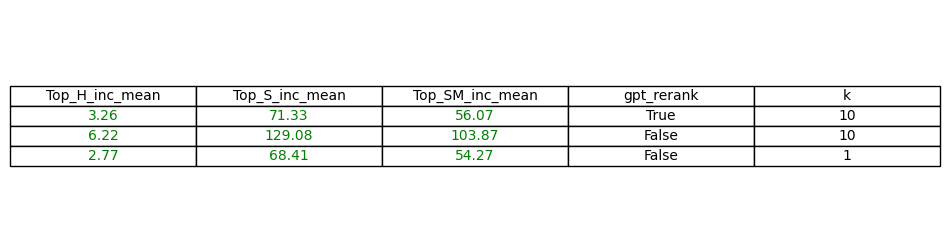

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 3))

ax.axis('off')

tbl = ax.table(
    cellText=final_results.values,
    colLabels=final_results.columns,
    loc='center',
    cellLoc='center',
)

apply_formatting(tbl, final_results)  # Applica il colore e l'arrotondamento qui

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.show()
